<a href="https://colab.research.google.com/github/CoffeGlory/LeetCodePractice/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab plays with linear transformation. We will deal with transition matrix, and manipulating images with matrices.

Here we try tiling the plane with a bird image(From _When life is linear_ by Tim Chartier)

In [1]:
# import packages
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
import matplotlib.patches
from PIL import Image


<Figure size 640x480 with 0 Axes>

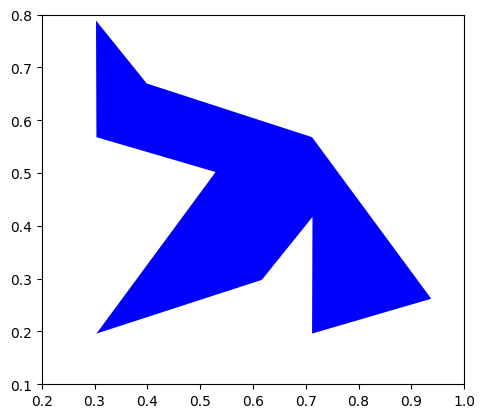

In [2]:
# make a basic bird polygon. Run the code to plot the bird

fig = plt.figure()
points = [[0.3036, 0.1960], [0.6168, 0.2977], [0.7128, 0.4169], [0.7120, 0.1960],[0.9377,0.2620],\
          [0.7120,0.5680],[0.3989,0.6697],[0.3028,0.7889],[0.3036,0.5680],[0.5293,0.5020]]

bird = matplotlib.patches.Polygon(points, facecolor='blue')

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(bird)

ax.set_xlim(0.2,1)
ax.set_ylim(0.1,0.8)
plt.show()

## Manipulating the figure (reflection, translation,and rotation) is done thru matrix multiplication.

Multiplying a vectot with $M = \begin{pmatrix}\cos\theta& -\sin\theta\\ \sin\theta& \cos\theta\end{pmatrix}$ gives rotation by angle $\theta$

In [3]:
# rotate bird 180 degrees about the origin, first define rotation matrix

rotationMatrix = lambda theta: np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

rotationMatrix

<function __main__.<lambda>(theta)>

Consider a vector $\mathbf{v}\in\mathbb{R}^2$, then $M\mathbf{v}$ is the vector $\mathbf{v}$ rotated by $\theta$. As previously defined, we take $\theta=\pi$

In [5]:
# rotate all points in original bird about the origin
rotatepoints_pi = []
for x in points:
    rotatepoints_pi.append(np.dot(rotationMatrix(np.pi),x))

<Figure size 640x480 with 0 Axes>

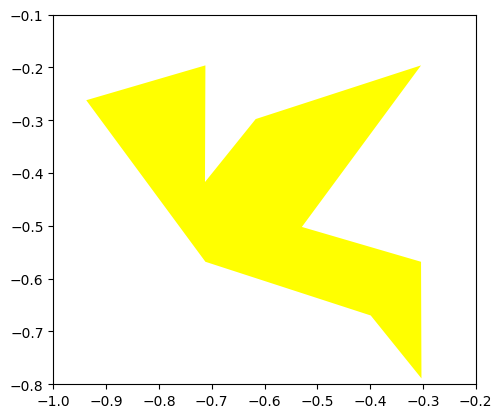

In [6]:
# Plot rotated bird. Run the code to plot the bird

fig = plt.figure()

rotatebird_pi = matplotlib.patches.Polygon(rotatepoints_pi, facecolor='yellow')

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(rotatebird_pi)

ax.set_xlim(-1,-0.2)
ax.set_ylim(-0.8,-0.1)
plt.show()

In [7]:
# Modify your code from above cells, rotate the bird some degrees, then plot it.
# You might need to move the axis when plotting.

# If you are having trouble, start from the code below and modify to rotate the bird
# fig = plt.figure()

# rotatebird_theta = matplotlib.patches.Polygon(rotatepoints_theta, facecolor='yellow')

# fig, ax = plt.subplots()
# ax.set_aspect("equal")
# ax.add_patch(rotatebird_theta)

# ax.set_xlim(-1,-0.2)
# ax.set_ylim(-0.8,-0.1)
# plt.show()

Given a vector $\mathbf{v}$, if we add the vector by $\mathbf{ u}$, then the result vector $\mathbf{u+v}$ is moved up by $u_1$, and to the right by $u_2$.

In [8]:
# define shift vector

shift = (2*0.7120, 2*0.4320)


In [16]:
# shift rotated bird up via matrix addition. Uncomment to show shifted points by addition
shiftpoints = []
for x in rotatepoints_pi:
    shiftpoints.append(x + shift)
shiftpoints

[array([1.1204, 0.668 ]),
 array([0.8072, 0.5663]),
 array([0.7112, 0.4471]),
 array([0.712, 0.668]),
 array([0.4863, 0.602 ]),
 array([0.712, 0.296]),
 array([1.0251, 0.1943]),
 array([1.1212, 0.0751]),
 array([1.1204, 0.296 ]),
 array([0.8947, 0.362 ])]

<Figure size 640x480 with 0 Axes>

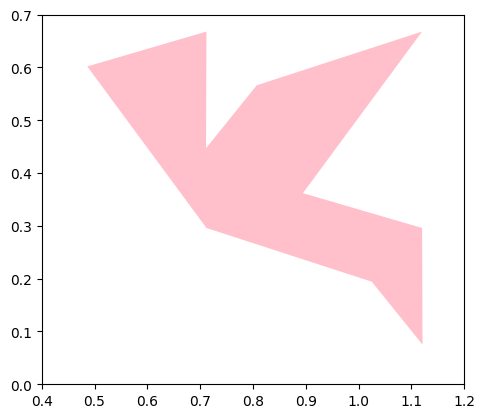

In [10]:
# Plot shifted bird. Run the code to plot the bird

fig = plt.figure()

shiftbird = matplotlib.patches.Polygon(shiftpoints, facecolor='pink')


fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(shiftbird)

ax.set_xlim(0.4,1.2)
ax.set_ylim(0.0,0.7)
plt.show()

<Figure size 640x480 with 0 Axes>

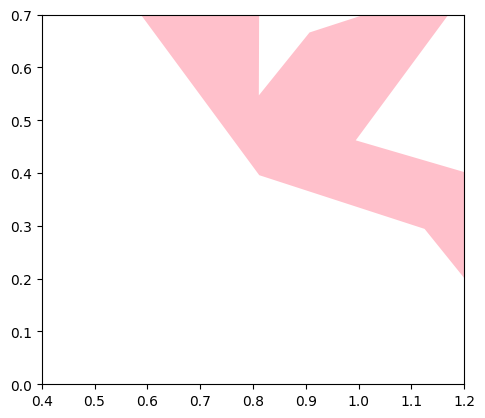

In [23]:
# Shift the bird by a quantity you choose. You might need to adjust the axes to
# make sure the bird is within range.

# If you are having trouble, modify the code below
fig = plt.figure()
shiftpoints1 = [(x + 0.1, y + 0.1) for x, y in shiftpoints]
shiftbird1 = matplotlib.patches.Polygon(shiftpoints1, facecolor='pink')


fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(shiftbird1)

ax.set_xlim(0.4,1.2)
ax.set_ylim(0.0,0.7)
plt.show()


## Now we will achieve the effect of rotating the bird 180 degrees about the point (0.7120, 0.4320)

In general, you can think about the process as translating the point (a,b) to the origin, rotating by $\theta$, then translating from the origin back to (a,b).

This is done via the following matrix multiplication:
$\begin{pmatrix}1&0&a\\0&1&b\\0&0&1\end{pmatrix}\begin{pmatrix}\cos\theta&-sin\theta&0\\ \sin\theta&\cos\theta&0\\0&0&1\end{pmatrix}\begin{pmatrix}1&0&-a\\0&1&-b\\0&0&1\end{pmatrix}$

Notice, the order of operation is matrix multiplied on the right is the first operation that applies to your vector. Matrix multiplication gives the following product:

$\begin{pmatrix}\cos\theta&-sin\theta&-a\cos\theta+b\sin\theta+a\\ \sin\theta&\cos\theta&-a\sin\theta-b\cos\theta+b\\0&0&1\end{pmatrix}$

We will then define the array in Numpy and give the point (a,b) and the rotation angle.

Note: here we artificially make the vector three dimensional to pack both rotation and shift in matrix multiplication. After we are done, we throw away the added third component.

In [24]:
# Define above array. Uncomment to show matrix

theta = np.pi
a = 0.7120
b = 0.4320
shiftrotateMatrix = lambda theta, a, b: np.array([[np.cos(theta),-np.sin(theta),-a*np.cos(theta)+b*np.sin(theta)+a],\
                              [np.sin(theta),np.cos(theta),-a*np.sin(theta)-b*np.cos(theta)+b],\
                              [0,0,1]])
print(shiftrotateMatrix(np.pi, 0.7120, 0.4310))

[[-1.0000000e+00 -1.2246468e-16  1.4240000e+00]
 [ 1.2246468e-16 -1.0000000e+00  8.6200000e-01]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [25]:
# notice the array is 3 by 3, so we will extend the points (x,y) to (x,y,1).
# Uncomment to see the new list of points3d
points3d = points
for x in points3d:
    x.append(1)

print(points3d)

[[0.3036, 0.196, 1], [0.6168, 0.2977, 1], [0.7128, 0.4169, 1], [0.712, 0.196, 1], [0.9377, 0.262, 1], [0.712, 0.568, 1], [0.3989, 0.6697, 1], [0.3028, 0.7889, 1], [0.3036, 0.568, 1], [0.5293, 0.502, 1]]


In [26]:
# rotate bird about the point (0.7120,0.4320)
pointsab = []
for x in points3d:
    pointsab.append(np.dot(shiftrotateMatrix(np.pi, 0.7120, 0.4310),x))

pointsab

[array([1.1204, 0.666 , 1.    ]),
 array([0.8072, 0.5643, 1.    ]),
 array([0.7112, 0.4451, 1.    ]),
 array([0.712, 0.666, 1.   ]),
 array([0.4863, 0.6   , 1.    ]),
 array([0.712, 0.294, 1.   ]),
 array([1.0251, 0.1923, 1.    ]),
 array([1.1212, 0.0731, 1.    ]),
 array([1.1204, 0.294 , 1.    ]),
 array([0.8947, 0.36  , 1.    ])]

In [28]:
# convert the list to 2D array. Uncomment to show finalpoints

finalpoints = [np.array([x[0],x[1]]) for x in pointsab]
print(finalpoints)

[array([1.1204, 0.666 ]), array([0.8072, 0.5643]), array([0.7112, 0.4451]), array([0.712, 0.666]), array([0.4863, 0.6   ]), array([0.712, 0.294]), array([1.0251, 0.1923]), array([1.1212, 0.0731]), array([1.1204, 0.294 ]), array([0.8947, 0.36  ])]


<Figure size 640x480 with 0 Axes>

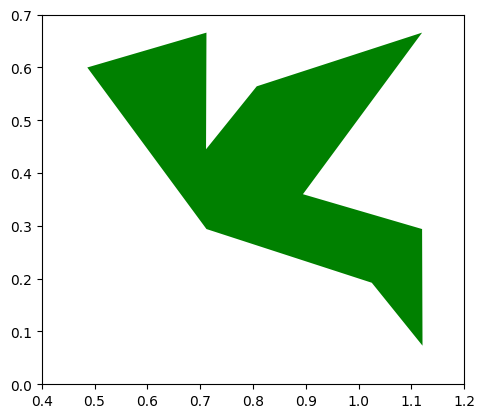

In [29]:
# plot final bird rotated about point (a,b). Run the cell to see figure

fig = plt.figure()

finalbird = matplotlib.patches.Polygon(finalpoints, facecolor='green')


fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.add_patch(finalbird)

ax.set_xlim(0.4,1.2)
ax.set_ylim(0.0,.7)
plt.show()

### Given $n$ vectors $\mathbf{a}_1,...,\mathbf{a}_n$ in a $n$ dimensional space, we check if the vectors are linearly dependent/independent, by considering the linear system $A\mathbf{c}=\mathbf{0}$.

In [30]:
# generate n random vectors and store in a n by n matrix. Print a submatrix of the matrix by uncommenting the
# print command and specifying which portion to print.
import numpy as np
n = m = 50

A = np.random.randint(5,size=(n,m))

print(A)

[[4 0 1 ... 4 2 4]
 [1 1 4 ... 4 0 2]
 [0 2 4 ... 3 3 2]
 ...
 [1 0 1 ... 3 1 1]
 [1 4 0 ... 0 0 4]
 [1 0 4 ... 2 4 4]]


In [31]:
# Print the first and last column of matrix A. Write a short code to check if they are linearly dependent.
print(A[:,0])


In [35]:
# Write a short code to check if the columns of A are linearly dependent. Also check the dimension of matrix.
# The problem is set up for square matrix, what do you need to do if the matrix is rectangular?



# If you are having trouble, uncomment the following and run the code. Think what this code does.
# rank_A = np.linalg.matrix_rank(A)
# num_cols = A.shape[1]

# if rank_A < num_cols:
#   True
# else:
#   False

(Extra credit- stress testing)

Compute the determinant of a $n\times n$ matrix A. Find for what values, Google colab thinks it is too big of a matrix.

The command for determinant is `np.linalg.det(A)`